In [1]:
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
data_origin = [[30, 100],
               [20, 50],
               [35, np.nan],
               [25, 80],
               [30, 70],
               [40, 60]]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data_origin)

SimpleImputer()

In [3]:
data_mean_imp = imp_mean.transform(data_origin)
print(data_mean_imp)

[[ 30. 100.]
 [ 20.  50.]
 [ 35.  72.]
 [ 25.  80.]
 [ 30.  70.]
 [ 40.  60.]]


In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

cancer_data = datasets.load_breast_cancer()

scaler = StandardScaler()

X = cancer_data.data
X = scaler.fit_transform(X)
y = cancer_data.target

In [12]:
import torch
import torch.nn as nn

X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(y.reshape(y.shape[0], 1))

In [13]:
torch.manual_seed(42)
learning_rate = 0.005

model = nn.Sequential(nn.Linear(X.shape[1], 1),
                          nn.Sigmoid())
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
def train_step(model, X_train, y_train, loss_function, optimizer):
    pred_train = model(X_train)
    loss = loss_function(pred_train, y_train)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss.item()

In [26]:
n_iter = 50

# Collecting losses during training
losses = []

# Simulating training loop and storing loss
for epoch in range(n_iter):
    loss = train_step(model, X_torch, y_torch, loss_function, optimizer)
    losses.append(loss)

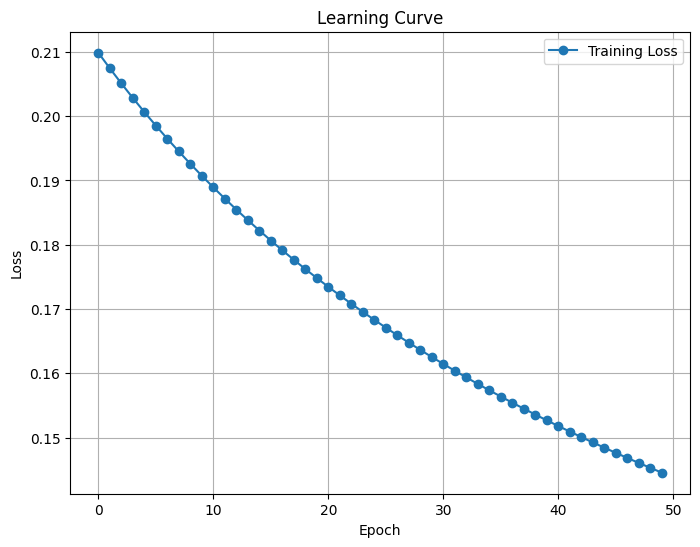

In [27]:
# Plotting the learning curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(n_iter), losses, marker='o', label='Training Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
print(model)

Sequential(
  (0): Linear(in_features=30, out_features=1, bias=True)
  (1): Sigmoid()
)


In [17]:
path = './model.pth '
torch.save(model, path)

In [20]:
new_model = torch.load(path, weights_only=False) 
print(new_model)

Sequential(
  (0): Linear(in_features=30, out_features=1, bias=True)
  (1): Sigmoid()
)
